In [1]:
from EventDriven.attributor import EVBAttributor
import pandas as pd



Console Logging & File Logging Can be configured using STREAM_LOG_LEVEL and FILE_LOG_LEVEL in environment variables.
Propagate to root logger can be set using PROPAGATE_TO_ROOT_LOGGER in environment variables.
Example:
STREAM_LOG_LEVEL = 'DEBUG'
FILE_LOG_LEVEL = 'INFO'
PROPAGATE_TO_ROOT_LOGGER = 'False'

2025-03-19 22:14:32 trade.helpers.Logging INFO: Logging Root Directory: /Users/chiemelienwanisobi/cloned_repos/QuantTools/logs
Using Proxy URL: http://18.232.166.224:5500/thetadata


In [2]:
trades = pd.read_csv('/Users/chiemelienwanisobi/cloned_repos/QuantTools/EventDriven/output/profitable_trades_options_10.csv').iloc[:, 1:]
trades = trades
trades

,Ticker,PnL,ReturnPct,EntryPrice,EntryCommission,EntrySlippage,EntryMarketValue,TotalEntryCost,AuxilaryEntryCost,ExitPrice,...,ExitSlippage,ExitMarketValue,TotalExitCost,AuxilaryExitCost,Quantity,EntryTime,ExitTime,Duration,Positions,SignalID
0,SBUX,-765.808141,-0.395094,193.829347,13.0,125.293468,1925.293468,19.382935,138.293468,117.248533,...,-89.514673,1185.485327,11.724853,102.514673,10,2023-01-04,2023-03-14,69,&L:SBUX20240119C115&S:SBUX20240119C120,SBUX20230104LONG
1,BA,-7.273412,-0.017810,204.193712,2.6,15.787423,405.787423,4.083874,18.387423,200.557006,...,-21.285988,403.714012,4.011140,23.885988,2,2023-01-04,2023-09-11,250,&L:BA20240119C220&S:BA20240119C225,BA20230104LONG
2,NVDA,3727.893075,1.346659,197.732434,18.2,125.054078,2750.054078,27.682541,143.254078,464.010511,...,-275.652847,6514.347153,64.961472,293.852847,14,2023-01-19,2023-12-20,335,&L:NVDA20240119C205&S:NVDA20240119C210,NVDA20230119LONG
3,NFLX,-571.844768,-0.589678,161.626284,7.8,61.957704,961.957704,9.697577,69.757704,66.318823,...,-14.287064,405.712936,3.979129,22.087064,6,2023-01-24,2023-09-27,246,&L:NFLX20240119C455&S:NFLX20240119C460,NFLX20230124LONG
4,META,968.626611,1.738711,185.698223,3.9,20.694668,553.194668,5.570947,24.594668,508.573760,...,-45.378721,1529.621279,15.257213,49.278721,3,2023-01-30,2023-12-21,325,&L:META20240119C165&S:META20240119C170,META20230130LONG
5,AMD,154.100485,0.075023,171.169501,15.6,58.434010,2038.434010,20.540340,74.034010,184.011208,...,-86.265505,2223.734495,22.081345,101.865505,12,2023-02-02,2023-09-21,231,&L:AMD20240119C100&S:AMD20240119C105,AMD20230202LONG
6,AAPL,-325.462116,-0.187831,192.526319,11.7,33.536869,1721.036869,17.327369,45.236869,156.363861,...,-66.025247,1418.974753,14.072748,77.725247,9,2023-02-03,2023-02-27,24,&L:AAPL20240119C170&S:AAPL20240119C175,AAPL20230203LONG
7,AAPL,226.612033,0.160565,201.620400,9.1,89.742802,1402.242802,14.113428,98.842802,233.993548,...,-102.945164,1647.054836,16.379548,112.045164,7,2023-03-06,2023-10-26,234,&L:AAPL20240315C170&S:AAPL20240315C175,AAPL20230306LONG
8,SBUX,-314.507168,-0.256819,204.104169,7.8,76.825011,1216.825011,12.246250,84.625011,151.686307,...,-57.082156,917.917844,9.101178,64.882156,6,2023-04-19,2023-05-04,15,&L:SBUX20240119C115&S:SBUX20240119C120,SBUX20230418LONG
9,AMZN,511.006650,0.535457,190.867516,6.5,35.337582,947.837582,9.543376,41.837582,293.068846,...,-28.155768,1471.844232,14.653442,34.655768,5,2023-04-28,2023-10-26,181,&L:AMZN20240315C135&S:AMZN20240315C145,AMZN20230428LONG


In [26]:
attributor = EVBAttributor(trades)
attributor.load_data(attribution = True, greeks = True, print_output = True, attribution_method='RV')

Starting 20
Completed 20ble dataing available data


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

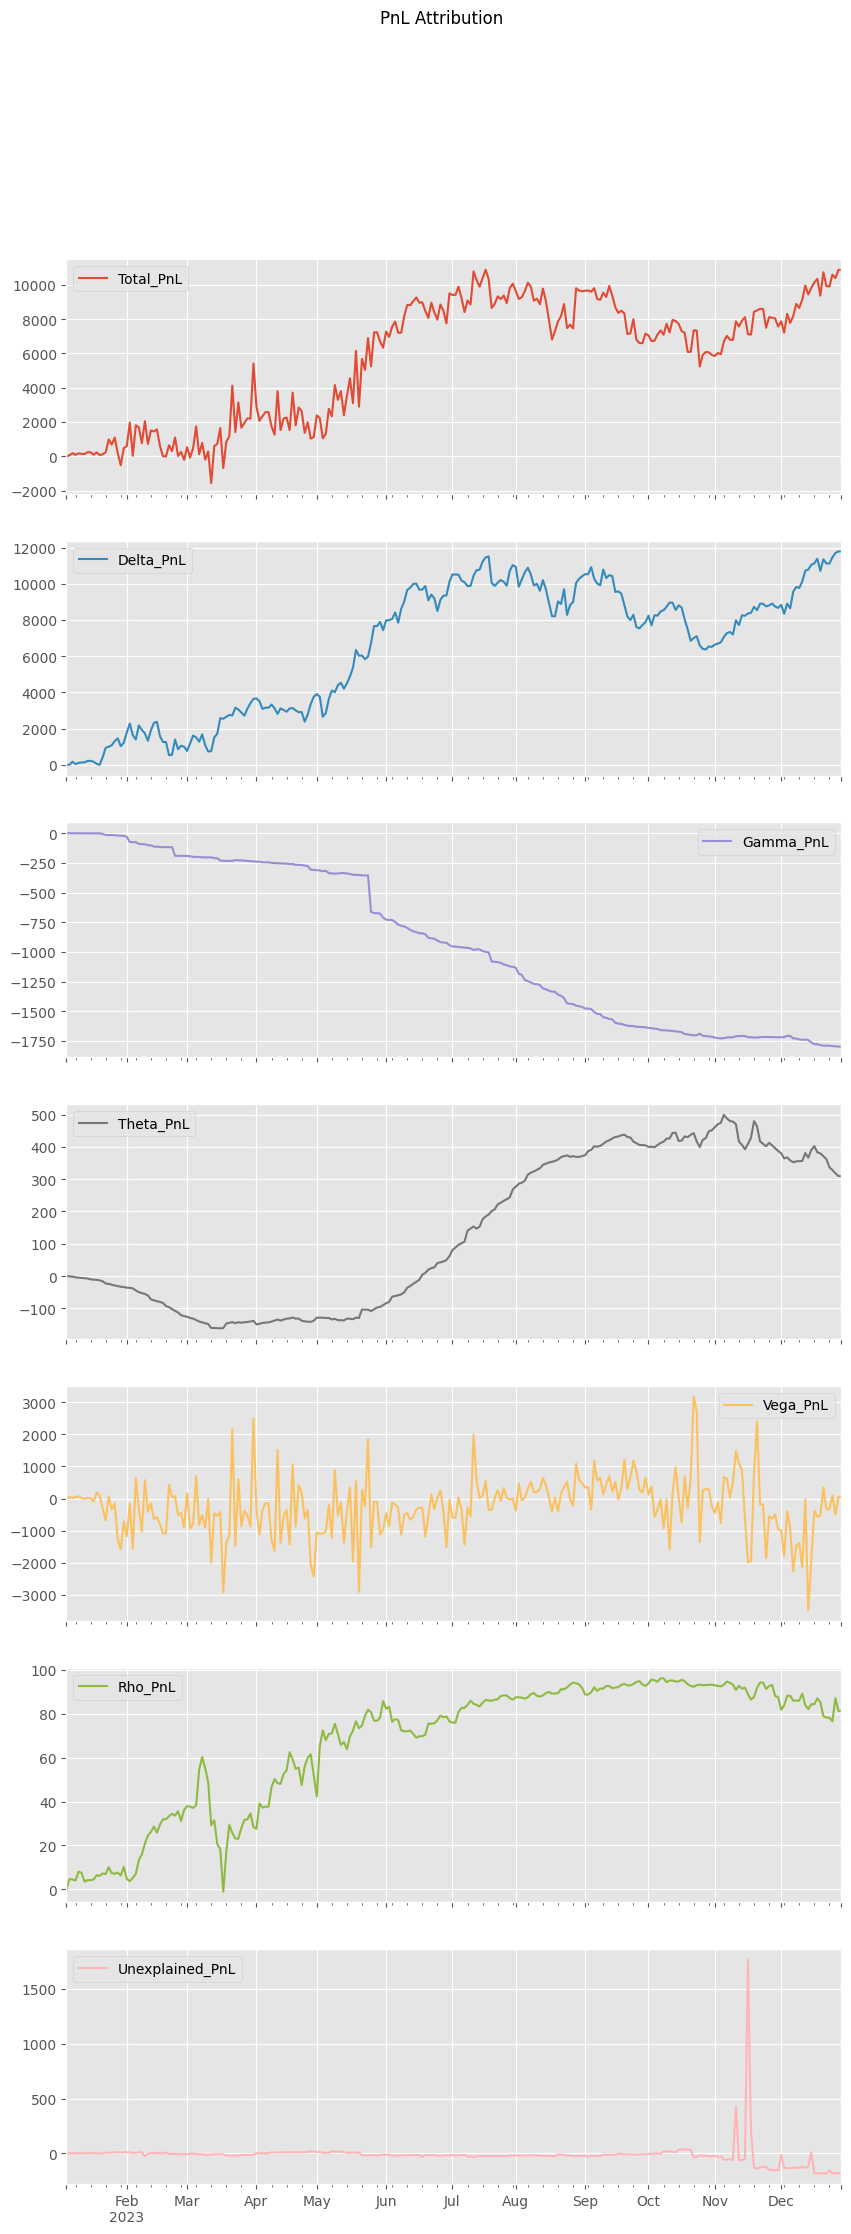

In [27]:
attributor.attribution.cumsum().plot(y = ['Total_PnL', 'Delta_PnL', 'Gamma_PnL', 'Theta_PnL', 'Vega_PnL', 'Rho_PnL', 'Unexplained_PnL'], figsize = (10, 25), title = 'PnL Attribution', subplots = True)

In [28]:
attributor.attribution.sort_values(by = 'Unexplained_PnL', ascending = False)

,Delta_PnL,Gamma_PnL,Vega_PnL,Volga_PnL,Theta_PnL,Rho_PnL,Vanna_PnL,Dividend_PnL,Total_PnL,Unexplained_PnL,Actual_PnL,Price
2023-11-16,122.207482,-9.242813,-1362.276319,245.783605,16.661025,-2.969921,-5.670076,0.0,-995.507017,1812.007017,816.5,20031.0
2023-11-10,786.057119,8.593892,998.301911,-634.320696,-8.038048,-2.429832,-60.732333,0.0,1087.432011,486.067989,1573.5,16751.0
2023-12-01,167.795225,1.019306,-20.336757,159.109959,-6.804126,-5.778892,5.052292,0.0,300.057007,138.442993,438.5,19255.0
2023-12-15,263.484698,-19.415081,1532.081871,-1485.487358,24.106679,2.220449,70.878616,0.0,387.869875,124.630125,512.5,20645.0
2023-12-25,0.000000,0.000000,0.000000,0.000000,-25.216679,0.000000,0.000000,0.0,-25.216679,25.216679,0.0,19062.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,-491.391183,0.257606,-800.685761,668.582428,-16.073063,2.034615,-23.627523,0.0,-660.902882,-118.097118,-779.0,18476.0
2023-12-18,76.633620,-14.956955,1565.753003,-1224.046123,11.594649,0.000000,-98.911849,0.0,316.066345,-188.566345,127.5,20772.5
2023-11-20,331.926082,-2.276881,2730.661937,-1695.579443,51.390497,1.249972,-81.567585,0.0,1335.804578,-327.304578,1008.5,19450.0
2023-11-13,-262.661816,1.946268,-382.634811,386.053626,-53.763120,1.865985,4.360603,0.0,-304.833265,-488.666735,-793.5,15957.5
